In [1]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
#from tensorflow.keras.applications import VGG16
from tensorflow.keras.layers import AveragePooling2D
from tensorflow import keras
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Input
from tensorflow.keras.models import Model
from keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf

2022-10-04 23:25:02.709747: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-10-04 23:25:03.111674: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-10-04 23:25:03.111696: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2022-10-04 23:25:03.151844: E tensorflow/stream_executor/cuda/cuda_blas.cc:2981] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2022-10-04 23:25:04.203185: W tensorflow/stream_executor/platform/de

In [2]:
data_generator = ImageDataGenerator(rescale=1./255, validation_split=0.30)

In [3]:
path = '/home/danilo/Documentos/dataset/archive/COVID-19_Radiography_Dataset'
batch_size = 64;

train_generator = data_generator.flow_from_directory(path, shuffle = True, seed = 13,
                                                     target_size=(64, 64),
                                                     color_mode="rgb",
                                                     class_mode = 'categorical', batch_size=batch_size,
                                                     subset = "training")
validation_generator = data_generator.flow_from_directory(path, shuffle = True, seed = 13,
                                                     target_size=(64, 64),
                                                     color_mode="rgb",
                                                     class_mode = 'categorical', batch_size=batch_size,
                                                     subset = "validation")

Found 23594 images belonging to 4 classes.
Found 10111 images belonging to 4 classes.


In [4]:
def getSamplesFromDataGen(resultData):
    x = resultData.next() #fetch the first batch
    a = x[0] # train data
    b = x[1] # train label
    for i in range(0,6):
        plt.grid(b=None)
        plt.imshow(a[i])
        plt.title(b[i])
        plt.show() 


/tmp/ipykernel_36806/1766510520.py:6: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  plt.grid(b=None)
/home/danilo/miniconda3/envs/dim0494/lib/python3.9/site-packages/matplotlib/text.py:1223: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


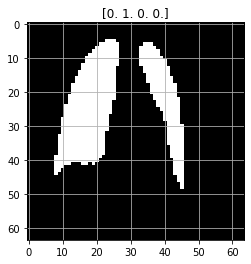

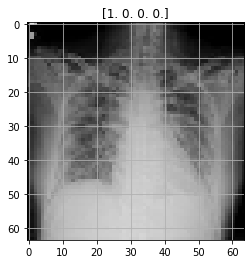

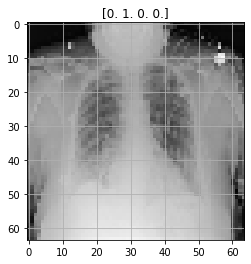

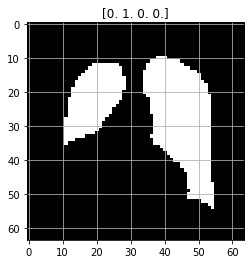

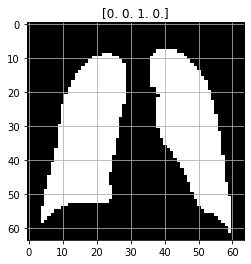

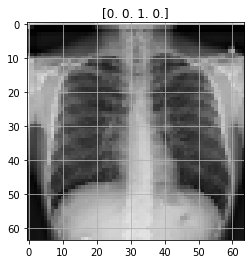

In [5]:
getSamplesFromDataGen(train_generator)

In [12]:
shape = (256, 256, 3)
num_classes = 4
model = keras.Sequential([
    keras.Input(shape),
    keras.layers.Conv2D(filters=16, kernel_size=(5,5), strides=(1,1), padding='same', activation='relu'),
    keras.layers.MaxPool2D(pool_size=(2,2)),
    keras.layers.Dropout(0.25),
    keras.layers.Conv2D(filters=32, kernel_size=(5,5), strides=(1,1), padding='same', activation='relu'),
    keras.layers.MaxPool2D(pool_size=(2,2)),
    keras.layers.Dropout(0.25),
    keras.layers.Conv2D(filters=64, kernel_size=(5,5), strides=(1,1), padding='same', activation='relu'),
    keras.layers.MaxPool2D(pool_size=(2,2)),
    keras.layers.Dropout(0.25),
    keras.layers.Conv2D(filters=128, kernel_size=(5,5), strides=(1,1), padding='same', activation='relu'),
    keras.layers.MaxPool2D(pool_size=(2,2)),
    keras.layers.Dropout(0.25),
    keras.layers.Conv2D(filters=256, kernel_size=(5,5), strides=(1,1), padding='same', activation='relu'),
    keras.layers.MaxPool2D(pool_size=(2,2)),
    keras.layers.Dropout(0.25),
    keras.layers.Flatten(),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dropout(0.25),
    keras.layers.Dense(num_classes, activation='softmax'),
    ])
model.summary()




Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_5 (Conv2D)           (None, 256, 256, 16)      1216      
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 128, 128, 16)     0         
 2D)                                                             
                                                                 
 dropout_6 (Dropout)         (None, 128, 128, 16)      0         
                                                                 
 conv2d_6 (Conv2D)           (None, 128, 128, 32)      12832     
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 64, 64, 32)       0         
 2D)                                                             
                                                                 
 dropout_7 (Dropout)         (None, 64, 64, 32)       

In [13]:
earlyStopping = EarlyStopping(monitor = 'val_loss', patience = 70, mode = 'min', restore_best_weights = True)

In [8]:
def compile_model(model):
  learning_rate = 0.00001
  model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate),
                loss='categorical_crossentropy')

In [9]:
def fit_model(model):
  history = model.fit(train_generator, validation_data=validation_generator, 
                      epochs=15, batch_size = 32, callbacks=[earlyStopping])
  return history

In [10]:
desnet = pre_trained_desnet()
compile_model(desnet)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 256, 256, 16)      1216      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 128, 128, 16)     0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 128, 128, 16)      0         
                                                                 
 conv2d_1 (Conv2D)           (None, 128, 128, 32)      12832     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 64, 64, 32)       0         
 2D)                                                             
                                                                 
 dropout_1 (Dropout)         (None, 64, 64, 32)        0

2022-10-04 23:25:21.475375: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2022-10-04 23:25:21.475396: W tensorflow/stream_executor/cuda/cuda_driver.cc:263] failed call to cuInit: UNKNOWN ERROR (303)
2022-10-04 23:25:21.475411: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (danilo): /proc/driver/nvidia/version does not exist
2022-10-04 23:25:21.475611: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [17]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(train_generator, validation_data=validation_generator, 
                      epochs=15, batch_size = 64, callbacks=earlyStopping)

Epoch 1/15


/tmp/ipykernel_36806/3149112475.py:5: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(train_generator, validation_data=validation_generator,


InvalidArgumentError: Graph execution error:

Detected at node 'sparse_categorical_crossentropy/SparseSoftmaxCrossEntropyWithLogits/SparseSoftmaxCrossEntropyWithLogits' defined at (most recent call last):
    File "/home/danilo/miniconda3/envs/dim0494/lib/python3.9/runpy.py", line 197, in _run_module_as_main
      return _run_code(code, main_globals, None,
    File "/home/danilo/miniconda3/envs/dim0494/lib/python3.9/runpy.py", line 87, in _run_code
      exec(code, run_globals)
    File "/home/danilo/miniconda3/envs/dim0494/lib/python3.9/site-packages/ipykernel_launcher.py", line 16, in <module>
      app.launch_new_instance()
    File "/home/danilo/miniconda3/envs/dim0494/lib/python3.9/site-packages/traitlets/config/application.py", line 846, in launch_instance
      app.start()
    File "/home/danilo/miniconda3/envs/dim0494/lib/python3.9/site-packages/ipykernel/kernelapp.py", line 677, in start
      self.io_loop.start()
    File "/home/danilo/miniconda3/envs/dim0494/lib/python3.9/site-packages/tornado/platform/asyncio.py", line 199, in start
      self.asyncio_loop.run_forever()
    File "/home/danilo/miniconda3/envs/dim0494/lib/python3.9/asyncio/base_events.py", line 601, in run_forever
      self._run_once()
    File "/home/danilo/miniconda3/envs/dim0494/lib/python3.9/asyncio/base_events.py", line 1905, in _run_once
      handle._run()
    File "/home/danilo/miniconda3/envs/dim0494/lib/python3.9/asyncio/events.py", line 80, in _run
      self._context.run(self._callback, *self._args)
    File "/home/danilo/miniconda3/envs/dim0494/lib/python3.9/site-packages/ipykernel/kernelbase.py", line 471, in dispatch_queue
      await self.process_one()
    File "/home/danilo/miniconda3/envs/dim0494/lib/python3.9/site-packages/ipykernel/kernelbase.py", line 460, in process_one
      await dispatch(*args)
    File "/home/danilo/miniconda3/envs/dim0494/lib/python3.9/site-packages/ipykernel/kernelbase.py", line 367, in dispatch_shell
      await result
    File "/home/danilo/miniconda3/envs/dim0494/lib/python3.9/site-packages/ipykernel/kernelbase.py", line 662, in execute_request
      reply_content = await reply_content
    File "/home/danilo/miniconda3/envs/dim0494/lib/python3.9/site-packages/ipykernel/ipkernel.py", line 360, in do_execute
      res = shell.run_cell(code, store_history=store_history, silent=silent)
    File "/home/danilo/miniconda3/envs/dim0494/lib/python3.9/site-packages/ipykernel/zmqshell.py", line 532, in run_cell
      return super().run_cell(*args, **kwargs)
    File "/home/danilo/miniconda3/envs/dim0494/lib/python3.9/site-packages/IPython/core/interactiveshell.py", line 2881, in run_cell
      result = self._run_cell(
    File "/home/danilo/miniconda3/envs/dim0494/lib/python3.9/site-packages/IPython/core/interactiveshell.py", line 2936, in _run_cell
      return runner(coro)
    File "/home/danilo/miniconda3/envs/dim0494/lib/python3.9/site-packages/IPython/core/async_helpers.py", line 129, in _pseudo_sync_runner
      coro.send(None)
    File "/home/danilo/miniconda3/envs/dim0494/lib/python3.9/site-packages/IPython/core/interactiveshell.py", line 3135, in run_cell_async
      has_raised = await self.run_ast_nodes(code_ast.body, cell_name,
    File "/home/danilo/miniconda3/envs/dim0494/lib/python3.9/site-packages/IPython/core/interactiveshell.py", line 3338, in run_ast_nodes
      if await self.run_code(code, result, async_=asy):
    File "/home/danilo/miniconda3/envs/dim0494/lib/python3.9/site-packages/IPython/core/interactiveshell.py", line 3398, in run_code
      exec(code_obj, self.user_global_ns, self.user_ns)
    File "/tmp/ipykernel_36806/3149112475.py", line 5, in <cell line: 5>
      history = model.fit_generator(train_generator, validation_data=validation_generator,
    File "/home/danilo/miniconda3/envs/dim0494/lib/python3.9/site-packages/keras/engine/training.py", line 2507, in fit_generator
      return self.fit(
    File "/home/danilo/miniconda3/envs/dim0494/lib/python3.9/site-packages/keras/utils/traceback_utils.py", line 65, in error_handler
      return fn(*args, **kwargs)
    File "/home/danilo/miniconda3/envs/dim0494/lib/python3.9/site-packages/keras/engine/training.py", line 1564, in fit
      tmp_logs = self.train_function(iterator)
    File "/home/danilo/miniconda3/envs/dim0494/lib/python3.9/site-packages/keras/engine/training.py", line 1160, in train_function
      return step_function(self, iterator)
    File "/home/danilo/miniconda3/envs/dim0494/lib/python3.9/site-packages/keras/engine/training.py", line 1146, in step_function
      outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "/home/danilo/miniconda3/envs/dim0494/lib/python3.9/site-packages/keras/engine/training.py", line 1135, in run_step
      outputs = model.train_step(data)
    File "/home/danilo/miniconda3/envs/dim0494/lib/python3.9/site-packages/keras/engine/training.py", line 994, in train_step
      loss = self.compute_loss(x, y, y_pred, sample_weight)
    File "/home/danilo/miniconda3/envs/dim0494/lib/python3.9/site-packages/keras/engine/training.py", line 1052, in compute_loss
      return self.compiled_loss(
    File "/home/danilo/miniconda3/envs/dim0494/lib/python3.9/site-packages/keras/engine/compile_utils.py", line 265, in __call__
      loss_value = loss_obj(y_t, y_p, sample_weight=sw)
    File "/home/danilo/miniconda3/envs/dim0494/lib/python3.9/site-packages/keras/losses.py", line 152, in __call__
      losses = call_fn(y_true, y_pred)
    File "/home/danilo/miniconda3/envs/dim0494/lib/python3.9/site-packages/keras/losses.py", line 272, in call
      return ag_fn(y_true, y_pred, **self._fn_kwargs)
    File "/home/danilo/miniconda3/envs/dim0494/lib/python3.9/site-packages/keras/losses.py", line 2084, in sparse_categorical_crossentropy
      return backend.sparse_categorical_crossentropy(
    File "/home/danilo/miniconda3/envs/dim0494/lib/python3.9/site-packages/keras/backend.py", line 5630, in sparse_categorical_crossentropy
      res = tf.nn.sparse_softmax_cross_entropy_with_logits(
Node: 'sparse_categorical_crossentropy/SparseSoftmaxCrossEntropyWithLogits/SparseSoftmaxCrossEntropyWithLogits'
logits and labels must have the same first dimension, got logits shape [4,4] and labels shape [256]
	 [[{{node sparse_categorical_crossentropy/SparseSoftmaxCrossEntropyWithLogits/SparseSoftmaxCrossEntropyWithLogits}}]] [Op:__inference_train_function_2616]

In [ ]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit_generator(train_generator,steps_per_epoch=train_generator.samples//batch_size,
        epochs=50,
        validation_data=validation_generator,
        validation_steps=validation_generator.samples//batch_size)
    
#train_generator, steps_per_epoch = train_generator.samples//batch_size,
 #                   epochs=50,
  #                  validation_data=validation_generator,validation_steps=validation_generator.samples//batch_size)

In [ ]:
def plot_res(history):
    metrics =  ['loss', 'precision', 'recall','accuracy']
    mpl.style.use('seaborn')
    plt.figure(figsize = (20, 15))
    for n, metric in enumerate(metrics):
        name = metric.replace("_"," ").capitalize()
        plt.subplot(2, 2, n+1)
        plt.plot(history.history[metric],'blue', label='Train')
        plt.plot(history.history['val_'+metric],'orange', label='Validation')
        plt.xlabel('Epoch')
        plt.ylabel(name)
    plt.legend()

plot_res(densenet_history2)